# Example 04 - Wideband Modulations Dataset
This notebook steps through an example of how to use `torchsig` to instantiate a custom, online `WidebandDataset` containing signals with up to 53 unique classes of modulations. The notebook then plots the signals using `Visualizers` for the Spectrogram representations of the dataset. 

-------------------------------------------

### Import Libraries

In [4]:
from torchsig.utils.visualize import MaskClassVisualizer, mask_class_to_outline, complex_spectrogram_to_magnitude
from torchsig.transforms.target_transforms import DescToMaskClass
from torchsig.datasets.wideband import WidebandModulationsDataset
from torchsig.transforms.transforms import Spectrogram, Normalize, Compose
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

----------------------------------
### Define Dataset Parameters & Transforms
The `WidebandModulationsDataset` inputs a list of modulations to include, and it also inputs the data and target transforms. Below's example includes the full list of all supported modulations, but a subset of this list can be selected to create an easier, more specialized task. The data transforms below are strictly the IQ to spectrogram transformation with a renormalization; however, these can be replaced with a custom composition of augmentations for tailored experiments. The target transform in this example transforms the `SignalMetadata` for each example into a set of masks for each class.

In [5]:
modulation_list = [
    "ook","bpsk","4pam","4ask","qpsk","8pam","8ask","8psk","16qam","16pam",
    "16ask","16psk","32qam","32qam_cross","32pam","32ask","32psk","64qam","64pam","64ask",
    "64psk","128qam_cross","256qam","512qam_cross","1024qam","2fsk","2gfsk","2msk","2gmsk","4fsk",
    "4gfsk","4msk","4gmsk","8fsk","8gfsk","8msk","8gmsk","16fsk","16gfsk","16msk","16gmsk",
    "ofdm-64","ofdm-72","ofdm-128","ofdm-180","ofdm-256","ofdm-300","ofdm-512","ofdm-600",
    "ofdm-900","ofdm-1024","ofdm-1200","ofdm-2048",
]    

fft_size = 512
num_classes = len(modulation_list)
num_iq_samples = fft_size * fft_size
num_samples = 20

data_transform = Compose([
    Spectrogram(nperseg=fft_size, noverlap=0, nfft=fft_size, mode='complex'),
    Normalize(norm=np.inf, flatten=True),
])

target_transform = Compose([
    DescToMaskClass(num_classes=num_classes, width=fft_size, height=fft_size),
])

-----------------------------
## Instantiate the Wideband Modulations Dataset
Using the above options, the `WidebandModulationsDataset` can be instantiated as shown below. Note that when using custom data transforms, the level options should be set to either 0 or 1, where the only difference between these levels is that level 0 results in fewer signal sources per sample than level 1.

In [6]:
wideband_modulations_dataset = WidebandModulationsDataset(
    modulation_list=modulation_list,
    level=2,
    num_iq_samples=num_iq_samples,
    num_samples=num_samples,
    transform=data_transform,
    target_transform=target_transform,
)

data, label = wideband_modulations_dataset[0]
print("Data shape: {}".format(data.shape))
print("Label shape: {}".format(label.shape))

Data shape: (2, 512, 512)
Label shape: (53, 512, 512)


---
### Data Plotting
After the dataset is instantiated, it can be viewed using the `MaskClassVisualizer` to verify both the transformed data and transformed annotations.

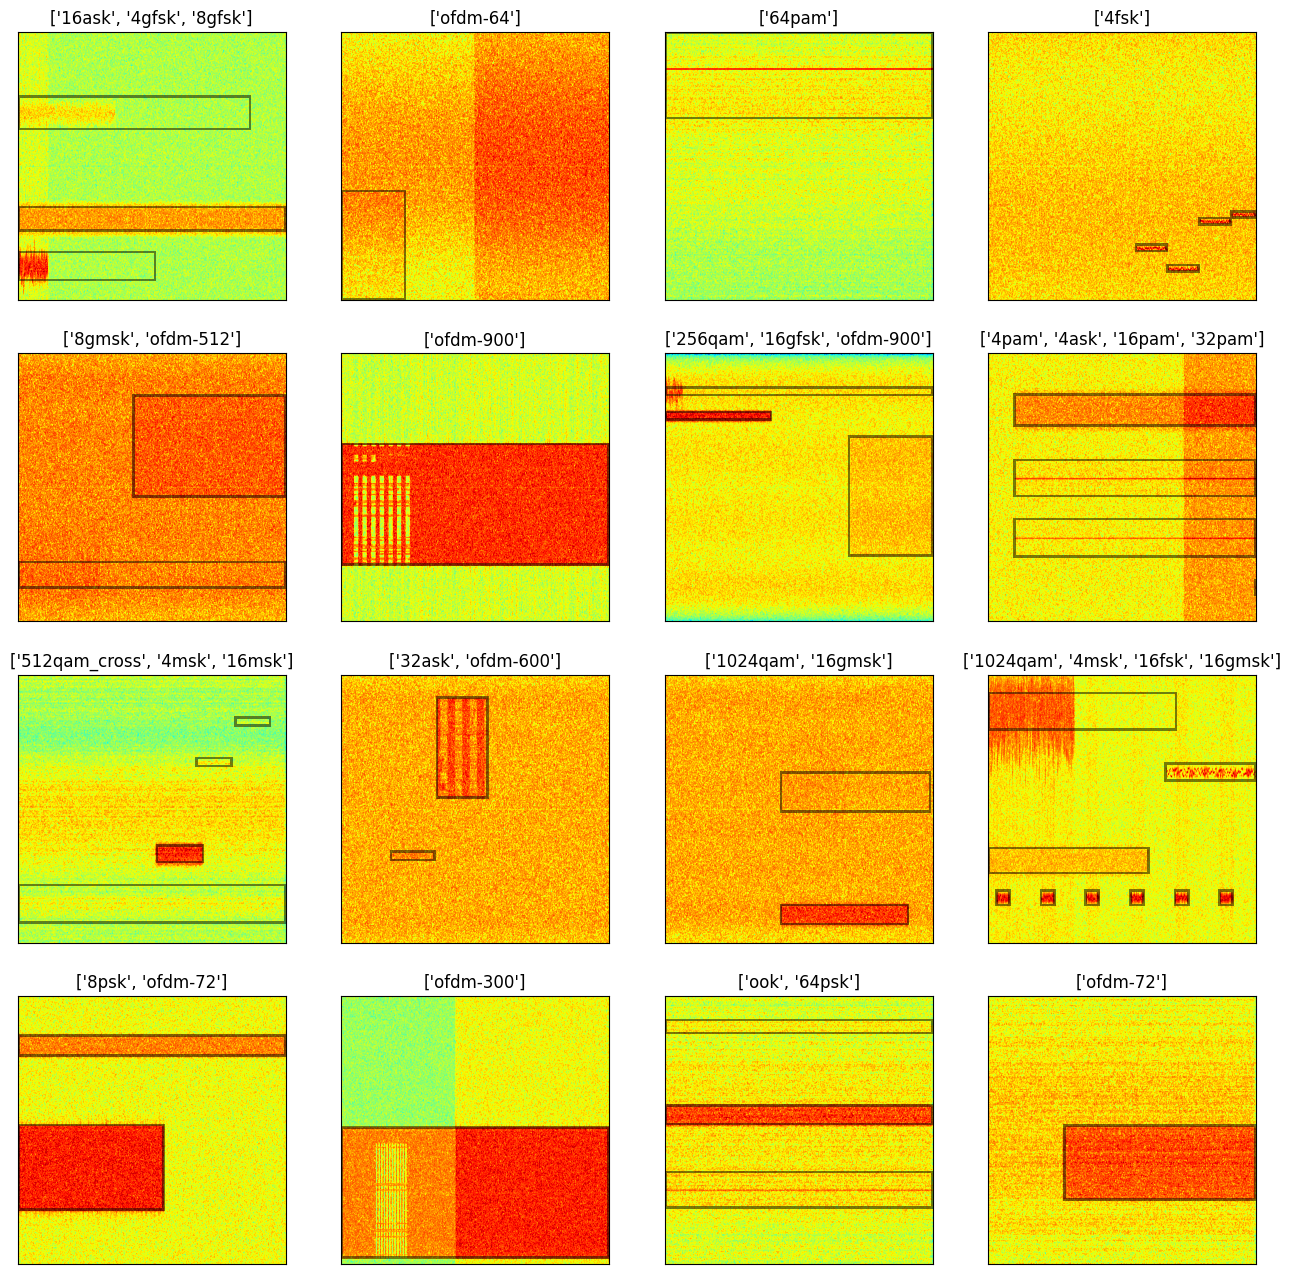

In [7]:
data_loader = DataLoader(
    dataset=wideband_modulations_dataset,
    batch_size=16,
    shuffle=True,
)

visualizer = MaskClassVisualizer(
    data_loader=data_loader,
    visualize_transform=complex_spectrogram_to_magnitude,
    visualize_target_transform=mask_class_to_outline,
    class_list=modulation_list,
)

for figure in iter(visualizer):
    figure.set_size_inches(16, 16)
    plt.show()
    break